In [141]:
import csv

import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Especificando cada caminho

In [142]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Número de CM's Classificadas

In [143]:
with open('model/keypoint_classifier/keypoint_classifier_label.csv',
        encoding='utf-8-sig') as f:
    NUM_CLASSES = row_count = sum(1 for row in csv.reader(f))

# Carregar dados de aprendizagem

In [144]:
X_dataset = np.loadtxt(
    dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [145]:
y_dataset = np.loadtxt(
    dataset, delimiter=',', dtype='int32', usecols=(0))

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Construindo modelo

In [147]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [148]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_16 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
# Callback de ponto de verificação do modelo
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback para interrupção antecipada
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [150]:
# Compilação do modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinamento do Modelo

In [151]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 9s 781ms/step - accuracy: 0.1172 - loss: 1.7731
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1513 - loss: 1.7025 - val_accuracy: 0.2739 - val_loss: 1.5769
Epoch 2/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2500 - loss: 1.6041
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2755 - loss: 1.5812 - val_accuracy: 0.4865 - val_loss: 1.5153
Epoch 3/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4062 - loss: 1.5505
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4135 - loss: 1.5164 - val_accuracy: 0.5171 - val_loss: 1.4492
Epoch 4/1000
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4531 - loss: 1.4522
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ke

In [152]:
# Avaliação do modelo
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9787 - loss: 0.2190 


In [153]:
# Carregando um modelo salvo
model = tf.keras.models.load_model(model_save_path)

In [154]:
# Teste de raciocínio
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[7.2065735e-04 8.0754839e-02 9.1758078e-01 1.3449657e-04 8.0916152e-04]
2


# Matriz de confusão

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


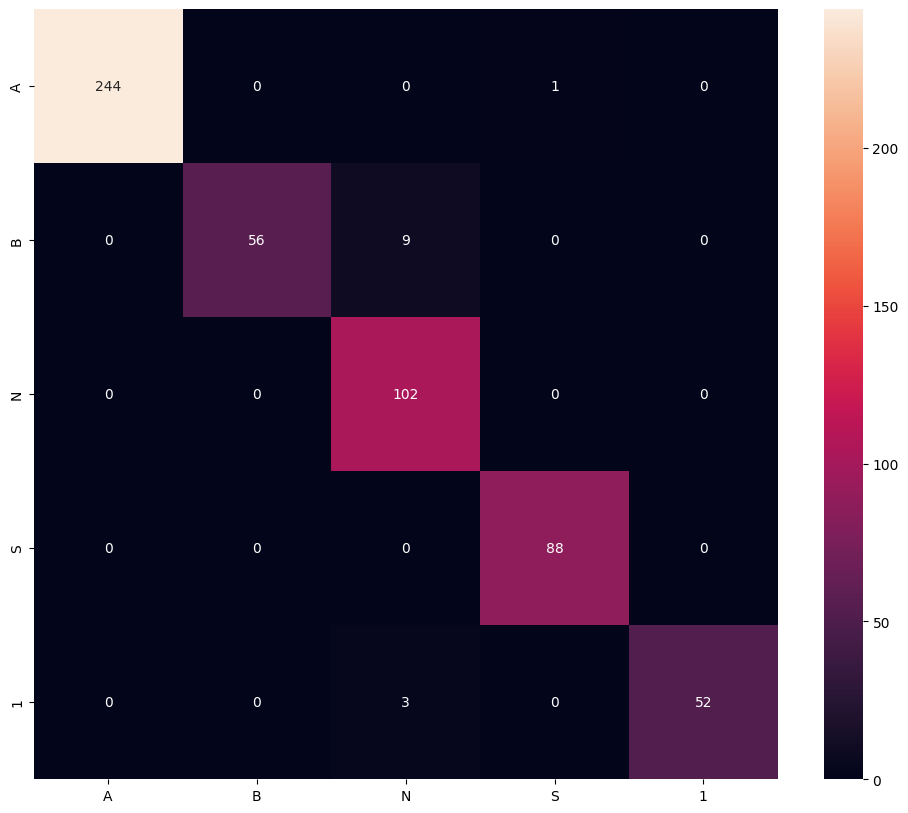

Classification Report
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       245
           B       1.00      0.86      0.93        65
           N       0.89      1.00      0.94       102
           S       0.99      1.00      0.99        88
           1       1.00      0.95      0.97        55

    accuracy                           0.98       555
   macro avg       0.98      0.96      0.97       555
weighted avg       0.98      0.98      0.98       555



In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    with open('model/keypoint_classifier/keypoint_classifier_label.csv',
            encoding='utf-8-sig') as f:
        keypoint_classifier_labels = csv.reader(f)
        keypoint_classifier_labels = [
            row[0] for row in keypoint_classifier_labels
        ]
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    labels = [keypoint_classifier_labels[i] for i in sorted(list(set(y_true)))]
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred, target_names=labels))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Converter para tensorflow lite

In [156]:
# Salvar como modelo apenas para inferência
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [157]:
# Transforme o modelo (quantizar)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ARTHUR~1\AppData\Local\Temp\tmpc8ck7i9g\assets


INFO:tensorflow:Assets written to: C:\Users\ARTHUR~1\AppData\Local\Temp\tmpc8ck7i9g\assets


Saved artifact at 'C:\Users\ARTHUR~1\AppData\Local\Temp\tmpc8ck7i9g'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_8')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2255080963152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2255080963536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2255099991760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2255099987152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2255099986960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2255099992912: TensorSpec(shape=(), dtype=tf.resource, name=None)


6600

# Teste de raciocínio

In [158]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [159]:
# Obtenha tensor de entrada/saída
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [160]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [161]:
%%time
# Implementação de inferência
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [162]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.2065712e-04 8.0754817e-02 9.1758090e-01 1.3449632e-04 8.0916123e-04]
2
